# Amazon Fine Food Reviews

## Import packages

In [1]:
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import string
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

## Loading Data

In [2]:
df=pd.read_csv('Reviews.csv')
df['Time']=df['Time'].apply(lambda x:datetime.fromtimestamp(x))
# get year and month
df['Year'] = df.Time.map(lambda x : x.year)
df['Month'] = df.Time.map(lambda x : x.month)
#rename the score variable
df.rename(columns={'Score':'Rating'},inplace=True)
df=df[['Rating','Text','Year','Month']]
df.head()

,Rating,Text,Year,Month
0,5,I have bought several of the Vitality canned d...,2011,4
1,1,Product arrived labeled as Jumbo Salted Peanut...,2012,9
2,4,This is a confection that has been around a fe...,2008,8
3,2,If you are looking for the secret ingredient i...,2011,6
4,5,Great taffy at a great price. There was a wid...,2012,10


In [3]:
# an example of review
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
text=list(df["Text"].values)
" ".join(list(text))

In [4]:
# look at main characters of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  568454 non-null  int64 
 1   Text    568454 non-null  object
 2   Year    568454 non-null  int64 
 3   Month   568454 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 17.3+ MB


In [5]:
# see if there is any missing values
df.isnull().any()

Rating    False
Text      False
Year      False
Month     False
dtype: bool

## Text Processing
- Removing Punctuations
- Removing Stop Words
- Lowercasing the Words
- Lemmatizing the Words

In [6]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    try:
        text = "".join([word.lower() for word in text if word not in string.punctuation])
    except:
        print(text)
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]
df['text_clean']=df['Text'].apply(lambda x: basic_clean(x))

## Exploratory Data Analysis

### Rating Distribution

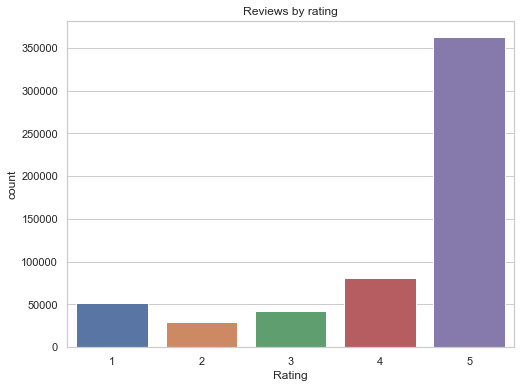

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Rating',data=df)
ax.set_title('Reviews by rating')
plt.savefig('review by rating.png')

The most part of this reviews is about 5 stars rating food. Followed by 4, 3, 1, 2.

### Number of reviews over time

In [8]:
def count_dataframe_by_group(df, groupname):
    review_counts = pd.DataFrame(df.groupby(groupname).size())
    review_counts.reset_index(inplace=True)
    review_counts.columns = [groupname, 'count']
    return review_counts

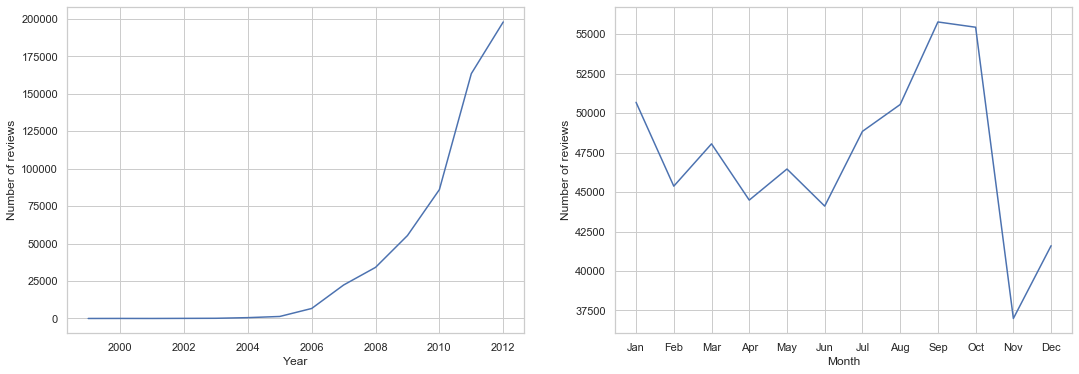

In [9]:
review_counts_year = count_dataframe_by_group(df, "Year")
review_counts_month = count_dataframe_by_group(df, "Month")

plt.figure(figsize=(18,6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

sns.lineplot(data=review_counts_year, x='Year', y='count', ax=ax1)
sns.lineplot(data=review_counts_month, x='Month', y='count', ax=ax2)
ax1.set_ylabel('Number of reviews')
ax2.set_ylabel('Number of reviews')

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec' ]
ax2.set_xticks(range(1,13))
ax2.set_xticklabels(month)
plt.savefig('review time.png')

It shows that bubble tea is getting more and more popular recently. Additionally, we can observe a substantial seasonal variation of the number of reviews and reach their maximum during September and October.

### Review length by sentiment

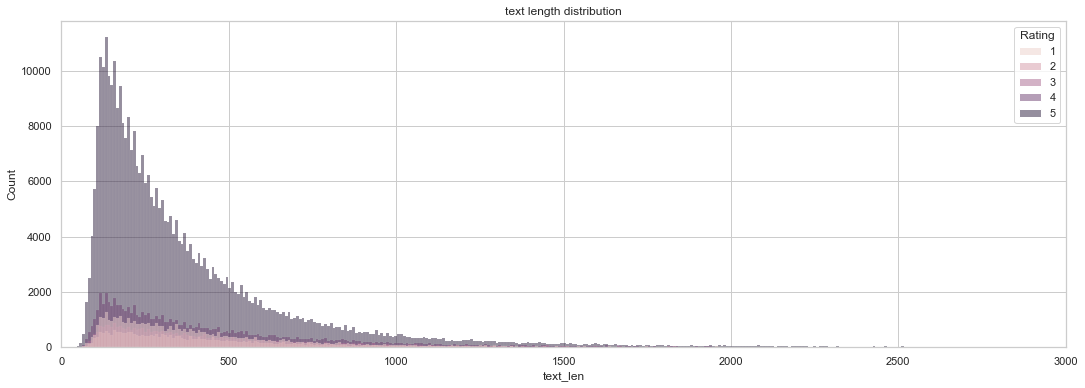

In [10]:
df['text_len'] = df.Text.apply(len)
plt.figure(figsize=(18,6))
sns.histplot(data=df, x='text_len',hue='Rating')
plt.xlim([0, 3000])
plt.title('text length distribution')
plt.savefig('text length distribution.png')

High rating reviews have greater number of words than lower ratings reviews.

### Common Words in Reviews

In [11]:
def review(text):
    review_str = ''
    for i in text:
        for j in i:
            review_str += j
            review_str += ' '
    return review_str
# get all words from all reviews
review_all=review(list(df['text_clean']))
# get all words from reviews of different ratings 
review1=review(list(df[df['Rating'] == 1]['text_clean']))
review2=review(list(df[df['Rating'] == 2]['text_clean']))
review3=review(list(df[df['Rating'] == 3]['text_clean']))
review4=review(list(df[df['Rating'] == 4]['text_clean']))
review5=review(list(df[df['Rating'] == 5]['text_clean']))

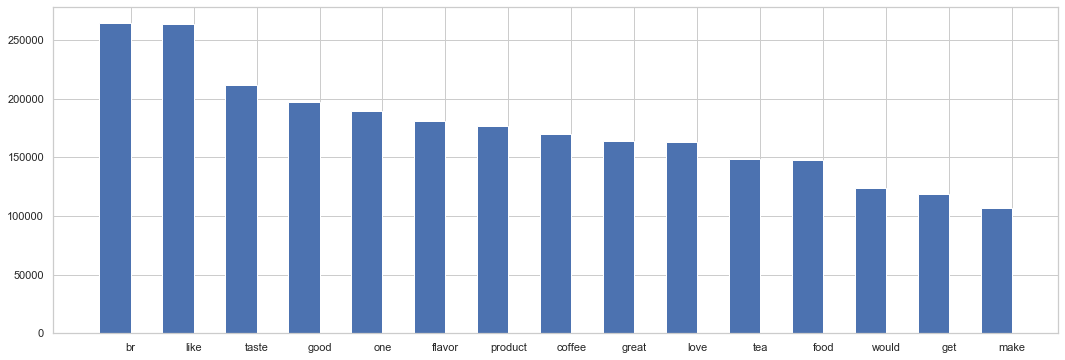

In [12]:
# plot most common words in reviews
words,value=zip(*Counter(review_all.split()).most_common()[0:15])
indexes = np.arange(len(words))
width = 0.5
plt.figure(figsize=(18,6))
plt.bar(indexes, value, width)
plt.xticks(indexes + width * 0.5, words)
plt.savefig('common words.png')
plt.show()

In [13]:
# add top 7 commons words to stopwords list
add_stop_words = [word for word, count in Counter(words).most_common()[0:7]]
stop_words=nltk.corpus.stopwords.words('english')+add_stop_words

In [14]:
# generate word clouds for reviews of different rating levels
wc1 = WordCloud(stopwords=stop_words,background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(review1)
wc2 = WordCloud(stopwords=stop_words,background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(review2)
wc3 = WordCloud(stopwords=stop_words,background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(review3)
wc4 = WordCloud(stopwords=stop_words,background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(review4)
wc5 = WordCloud(stopwords=stop_words,background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(review5)

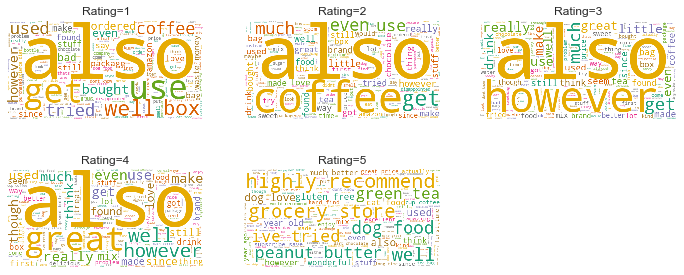

In [15]:
# plot word clouds
plt.figure(figsize=(12,5))
plt.subplot(231)
plt.imshow(wc1)
plt.axis('off')
plt.title('Rating=1')

plt.subplot(232)
plt.imshow(wc2)
plt.axis('off')
plt.title('Rating=2')

plt.subplot(233)
plt.imshow(wc3)
plt.axis('off')
plt.title('Rating=3')

plt.subplot(234)
plt.imshow(wc4)
plt.axis('off')
plt.title('Rating=4')

plt.subplot(235)
plt.imshow(wc5)
plt.axis('off')
plt.title('Rating=5')
plt.savefig('wordcloud.png')

In [ ]:
df.to_pickle('data.pkl')